In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Embedding,Bidirectional,Flatten,Dense,GlobalAveragePooling1D,Conv1D,LSTM,GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

In [2]:
path = '/content/drive/MyDrive/twitter sentiment analysis/training.1600000.processed.noemoticon.csv'

In [98]:
pd.set_option("display.max_colwidth", -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
columns=['target','id','date','flag','user','text']
df=pd.read_csv(path,names=columns,encoding='latin-1')
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])
X=df['text']
Y=df['target']
Y = to_categorical(Y, 3)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [5]:
vocab=100000
embedding_dim=64
oov_token='<OOV>'
pad_type='post'
trunc_type='post'
maxlen=64

In [6]:
tokenizer=Tokenizer(num_words=vocab,oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
train_sequences=tokenizer.texts_to_sequences(X_train)
train_final=pad_sequences(train_sequences,padding=pad_type,truncating=trunc_type,maxlen=maxlen)

test_sequences=tokenizer.texts_to_sequences(X_test)
test_final=pad_sequences(test_sequences,padding=pad_type,truncating=trunc_type,maxlen=maxlen)

In [7]:
model=tf.keras.Sequential([Embedding(vocab,embedding_dim,input_length=64),
                          Bidirectional(GRU(64)),
                          Dense(64,activation='relu'),
                          Dense(3,activation='softmax')
                          ])

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history=model.fit(train_final,Y_train,epochs=1)

Epoch 1/3
40000/40000 [==============================] - 5013s 125ms/step - loss: 0.4005 - accuracy: 0.8169
Epoch 2/3
40000/40000 [==============================] - 4487s 112ms/step - loss: 0.3425 - accuracy: 0.8492
Epoch 3/3
40000/40000 [==============================] - 5011s 125ms/step - loss: 0.3096 - accuracy: 0.8671


In [14]:
model.save('/content/drive/MyDrive/twitter sentiment analysis/model.h5')


In [19]:
import pickle

In [36]:
with open("/content/drive/MyDrive/twitter sentiment analysis/encoder.pk",'wb') as f:
    pickle.dump(le,f)

Text(0.5, 1.0, 'Acuracy Vs Epochs')

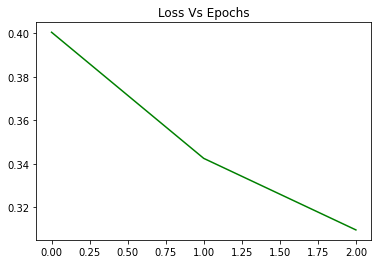

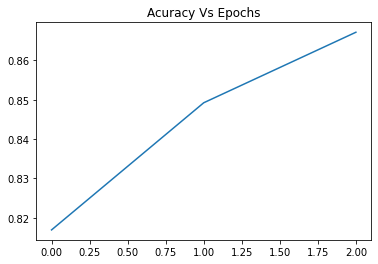

In [11]:
loss=history.history['loss']
acc=history.history['accuracy']
plt.figure()
plt.plot(loss,color='g')
plt.title('Loss Vs Epochs')
plt.figure()
plt.plot(acc)
plt.title('Acuracy Vs Epochs')

In [12]:
model.evaluate(test_final,Y_test)

10000/10000 [==============================] - 143s 14ms/step - loss: 0.3811 - accuracy: 0.8313


[0.3810659348964691, 0.8312656283378601]

In [15]:
test_final

array([[91002,    40,   318, ...,     0,     0,     0],
       [    1,   569,     2, ...,     0,     0,     0],
       [    1,    15,    44, ...,     0,     0,     0],
       ...,
       [   68,    34,     4, ...,     0,     0,     0],
       [  172,   142,    12, ...,     0,     0,     0],
       [    2,   201,    17, ...,     0,     0,     0]], dtype=int32)

In [23]:
X_test.shape

(320000,)

In [84]:
input_data =np.array([' what do you like love and kisses'])
input_data.shape

(1,)

In [85]:
input_sequences=tokenizer.texts_to_sequences(input_data)
input_final=pad_sequences(input_sequences,padding=pad_type,truncating=trunc_type,maxlen=maxlen)

In [86]:
result = model.predict(input_final)

In [87]:

np.round(result[0], 2).argmax()

1

In [90]:
df.head(1000).to_csv('small_dataset.csv')

In [100]:
df[df['target'] == 1].head(1000).to_csv('pos_tweets.csv')

In [ ]:
pip freeze